In [1]:
# Import packages.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Analysis 
counties in top quartile of total votes and with highest and lowest percentage of votes for each canditate.

In [2]:
# Load data.
df = pd.read_csv('Resources/countypres_2000-2016.csv')
df.head()

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version
0,2000,Alabama,AL,Autauga,1001.0,President,Al Gore,democrat,4942.0,17208,20191203
1,2000,Alabama,AL,Autauga,1001.0,President,George W. Bush,republican,11993.0,17208,20191203
2,2000,Alabama,AL,Autauga,1001.0,President,Ralph Nader,green,160.0,17208,20191203
3,2000,Alabama,AL,Autauga,1001.0,President,Other,NaN,113.0,17208,20191203
4,2000,Alabama,AL,Baldwin,1003.0,President,Al Gore,democrat,13997.0,56480,20191203


In [3]:
#Add new columns for percent of total votes per county.
df['percent'] = df['candidatevotes'] / df['totalvotes']
df.head()

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version,percent
0,2000,Alabama,AL,Autauga,1001.0,President,Al Gore,democrat,4942.0,17208,20191203,0.287192
1,2000,Alabama,AL,Autauga,1001.0,President,George W. Bush,republican,11993.0,17208,20191203,0.696943
2,2000,Alabama,AL,Autauga,1001.0,President,Ralph Nader,green,160.0,17208,20191203,0.009298
3,2000,Alabama,AL,Autauga,1001.0,President,Other,NaN,113.0,17208,20191203,0.006567
4,2000,Alabama,AL,Baldwin,1003.0,President,Al Gore,democrat,13997.0,56480,20191203,0.247822


In [4]:
# Make df for just 2016.
df_2016 = df[df['year']==2016]
df_2016.head()

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version,percent
40517,2016,Alabama,AL,Autauga,1001.0,President,Hillary Clinton,democrat,5936.0,24973,20191203,0.237697
40518,2016,Alabama,AL,Autauga,1001.0,President,Donald Trump,republican,18172.0,24973,20191203,0.727666
40519,2016,Alabama,AL,Autauga,1001.0,President,Other,NaN,865.0,24973,20191203,0.034637
40520,2016,Alabama,AL,Baldwin,1003.0,President,Hillary Clinton,democrat,18458.0,95215,20191203,0.193856
40521,2016,Alabama,AL,Baldwin,1003.0,President,Donald Trump,republican,72883.0,95215,20191203,0.765457


In [41]:
# Sort by descending order.
try_this.head()

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version,percent
45543,2016,Nebraska,NE,Keya Paha,31103.0,President,Donald Trump,republican,460.0,479,20191203,0.960334
39051,2012,Texas,TX,King,48269.0,President,Mitt Romney,republican,139.0,145,20191203,0.958621
48588,2016,Texas,TX,Roberts,48393.0,President,Donald Trump,republican,524.0,554,20191203,0.945848
48402,2016,Texas,TX,King,48269.0,President,Donald Trump,republican,149.0,159,20191203,0.937107
38330,2012,South Dakota,SD,Oglala Lakota,46113.0,President,Barack Obama,democrat,2937.0,3145,20191203,0.933863


In [43]:
# Divide Counties Into Quartiles.
quants = pd.qcut(df_2016['totalvotes'], q=4)
quants.head(5)

40517      (10872.5, 29443.0]
40518      (10872.5, 29443.0]
40519      (10872.5, 29443.0]
40520    (29443.0, 3434308.0]
40521    (29443.0, 3434308.0]
Name: totalvotes, dtype: category
Categories (4, interval[float64]): [(-0.001, 4982.0] < (4982.0, 10872.5] < (10872.5, 29443.0] < (29443.0, 3434308.0]]

In [5]:
# Stats.
df_2016.describe()

,year,FIPS,candidatevotes,totalvotes,version,percent
count,9474.0,9465.000000,9.468000e+03,9.474000e+03,9474.0,9468.000000
mean,2016.0,30287.963867,1.441651e+04,4.323469e+04,20191203.0,0.333008
std,0.0,15234.797191,5.327001e+04,1.249080e+05,0.0,0.268664
min,2016.0,1001.000000,3.000000e+00,0.000000e+00,20191203.0,0.003344
25%,2016.0,18161.000000,6.917500e+02,4.982000e+03,20191203.0,0.066269
50%,2016.0,29167.000000,2.758500e+03,1.087250e+04,20191203.0,0.273005
75%,2016.0,45077.000000,8.965750e+03,2.944300e+04,20191203.0,0.579834
max,2016.0,56045.000000,2.464364e+06,3.434308e+06,20191203.0,0.960334


In [6]:
# 4th Quartile DF

highest_tot_votes = df_2016[df_2016['totalvotes'] > 29442]
highest_tot_votes = highest_tot_votes[highest_tot_votes['candidate'] !='Other']
highest_tot_votes.head()

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version,percent
40520,2016,Alabama,AL,Baldwin,1003.0,President,Hillary Clinton,democrat,18458.0,95215,20191203,0.193856
40521,2016,Alabama,AL,Baldwin,1003.0,President,Donald Trump,republican,72883.0,95215,20191203,0.765457
40538,2016,Alabama,AL,Calhoun,1015.0,President,Hillary Clinton,democrat,13242.0,47864,20191203,0.276659
40539,2016,Alabama,AL,Calhoun,1015.0,President,Donald Trump,republican,32865.0,47864,20191203,0.686633
40580,2016,Alabama,AL,Cullman,1043.0,President,Hillary Clinton,democrat,3798.0,37873,20191203,0.100283


## TODO: Subset DF to just look for voteing percentages within .45 & .55

In [10]:
# Show counties who were close in results

even = highest_tot_votes[highest_tot_votes['percent'] > .45] #& (highest_tot_votes[highest_tot_votes['percent'] < .56)]
#current_cases_MN = cases[(cases['state'] == 'Minnesota') | (cases['state'] == 'Iowa') | (cases['state'] == 'South Dakota')] 
even.head(1)

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version,percent
40521,2016,Alabama,AL,Baldwin,1003.0,President,Donald Trump,republican,72883.0,95215,20191203,0.765457


In [11]:
even = highest_tot_votes[highest_tot_votes['percent'] < .56]
even.head(1)

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version,percent
40520,2016,Alabama,AL,Baldwin,1003.0,President,Hillary Clinton,democrat,18458.0,95215,20191203,0.193856


# Show counties with Highest and Lowest Percentage

In [13]:
# Sort by highest percentage.

sorted_= highest_tot_votes.sort_values(by=['percent'], ascending =False)
sorted_.head(5)

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version,percent
41387,2016,District of Columbia,DC,District of Columbia,11001.0,President,Hillary Clinton,democrat,282830.0,311268,20191203,0.908638
45920,2016,New York,NY,Bronx,36005.0,President,Hillary Clinton,democrat,353646.0,399522,20191203,0.885173
44051,2016,Maryland,MD,Prince George's,24033.0,President,Hillary Clinton,democrat,344049.0,390385,20191203,0.881307
40581,2016,Alabama,AL,Cullman,1043.0,President,Donald Trump,republican,32989.0,37873,20191203,0.871043
46004,2016,New York,NY,New York,36061.0,President,Hillary Clinton,democrat,579013.0,668939,20191203,0.865569


In [14]:
# Now divide by votes for Clinton or Trump to see biggest percentage win for each.

sorted_HC = sorted_[sorted_['candidate']=='Hillary Clinton']
sorted_HC.head()

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version,percent
41387,2016,District of Columbia,DC,District of Columbia,11001.0,President,Hillary Clinton,democrat,282830.0,311268,20191203,0.908638
45920,2016,New York,NY,Bronx,36005.0,President,Hillary Clinton,democrat,353646.0,399522,20191203,0.885173
44051,2016,Maryland,MD,Prince George's,24033.0,President,Hillary Clinton,democrat,344049.0,390385,20191203,0.881307
46004,2016,New York,NY,New York,36061.0,President,Hillary Clinton,democrat,579013.0,668939,20191203,0.865569
41099,2016,California,CA,San Francisco,6075.0,President,Hillary Clinton,democrat,345084.0,405792,20191203,0.850396


In [15]:
# Subset for Plotting purpsoes.
top_15 = sorted_HC[0:15]
bottom_15= sorted_HC[775:]

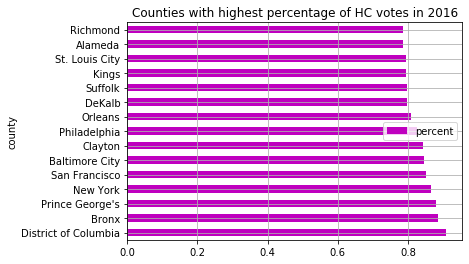

In [47]:
top_15.plot.barh(x = 'county',y='percent',color='m', title='Counties with highest percentage of HC votes in 2016',grid=True)

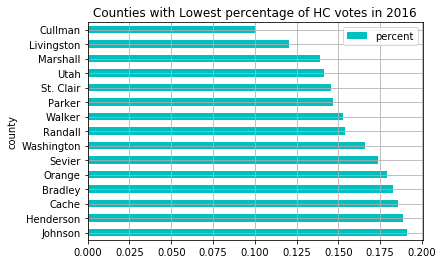

In [16]:
bottom_15.plot.barh(x = 'county',y='percent',color='c', title='Counties with Lowest percentage of HC votes in 2016',grid=True)